In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import random

In [10]:
# Load data
data_path = 'bank-data.csv'
df = pd.read_csv(data_path)
df.head()

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,ID12102,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,ID12103,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,ID12104,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,ID12105,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


In [36]:
attrs = ['age', 'income', 'children']
mean = df[attrs].mean()
print(f"Mean: \n\n{mean}")
print(f"\nDatatypes: \n\n{df.dtypes}")

Mean: 

age            42.395000
income      27524.031217
children        1.011667
dtype: float64

Datatypes: 

id              object
age              int64
sex             object
region          object
income         float64
married         object
children         int64
car             object
save_act        object
current_act     object
mortgage        object
pep             object
dtype: object


In [11]:
df_processed = df.copy()
region_map = {'INNER_CITY': 0, 'TOWN': 1, 'RURAL': 2, 'SUBURBAN': 3}
sex_map = {'FEMALE': 0, 'MALE': 1}
df_processed['region'] = df_processed['region'].replace(region_map)
df_processed.replace({"YES": 1, "NO": 0}, inplace=True)
df_processed['sex'] = df_processed['sex'].replace(sex_map)
for idx, val in enumerate(df_processed['age']):
    if val <= 30:
        df_processed.at[idx, 'age'] = 0 #Dưới 30 tuổi
    elif 30 < val <= 50:
        df_processed.at[idx, 'age'] = 1 #Khoảng 30 - 50 tuổi
    else:
        df_processed.at[idx, 'age'] = 2 #Trên 50 tuổi

for idx, val in enumerate(df_processed['income']):
    if val <= 20000:
        df_processed.at[idx, 'income'] = 0 #Dưới 20000 (Thu nhập thấp)
    elif 20000 < val <= 40000:
        df_processed.at[idx, 'income'] = 1 #Khoảng 20000 - 40000 (Thu nhập trung)
    else:
        df_processed.at[idx, 'income'] = 2 #Trên 40000 (Thu nhập cao)
df_processed['income'] = df_processed['income'].astype(int)
if 'id' in df_processed:
    df_processed.drop('id', axis=1, inplace=True) 
df_processed.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_28848\461260642.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_processed['region'] = df_processed['region'].replace(region_map)
C:\Users\Admin\AppData\Local\Temp\ipykernel_28848\461260642.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_processed.replace({"YES": 1, "NO": 0}, inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_28848\461260642.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old 

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,1,0,0,0,0,1,0,0,0,0,1
1,1,1,1,1,1,3,1,0,1,1,0
2,2,0,0,0,1,0,1,1,1,0,0
3,0,0,1,1,1,3,0,0,1,0,0
4,2,0,2,2,1,0,0,1,0,0,0


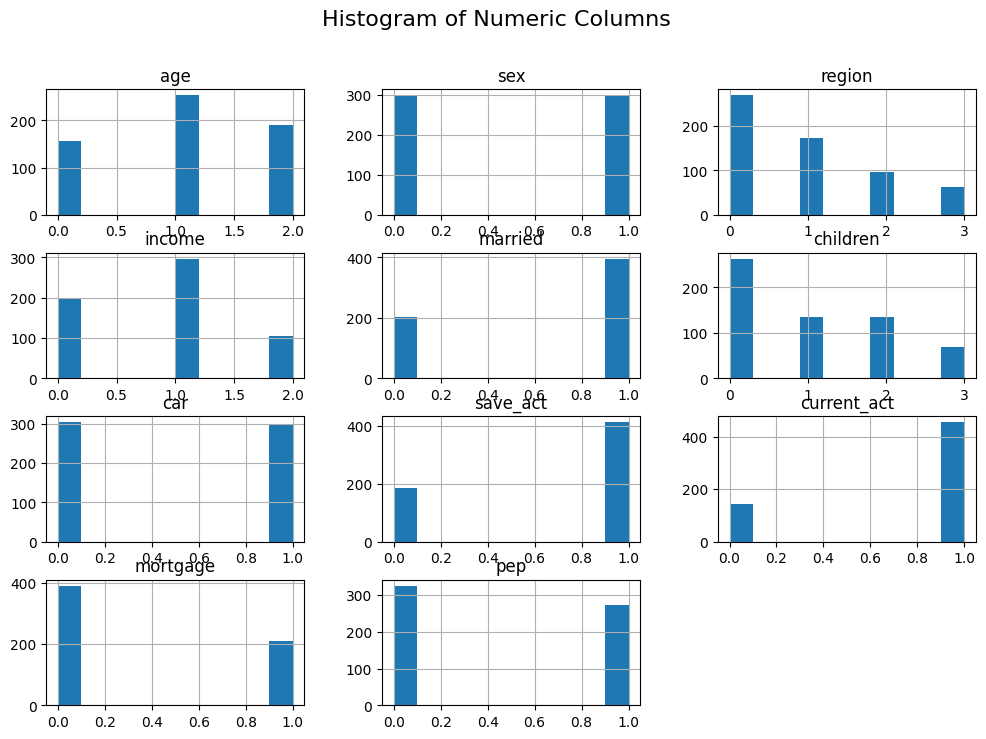

In [12]:
#Histogram
df_processed.hist(bins=10, figsize=(12,8))
plt.suptitle('Histogram of Numeric Columns', fontsize=16)
plt.show()

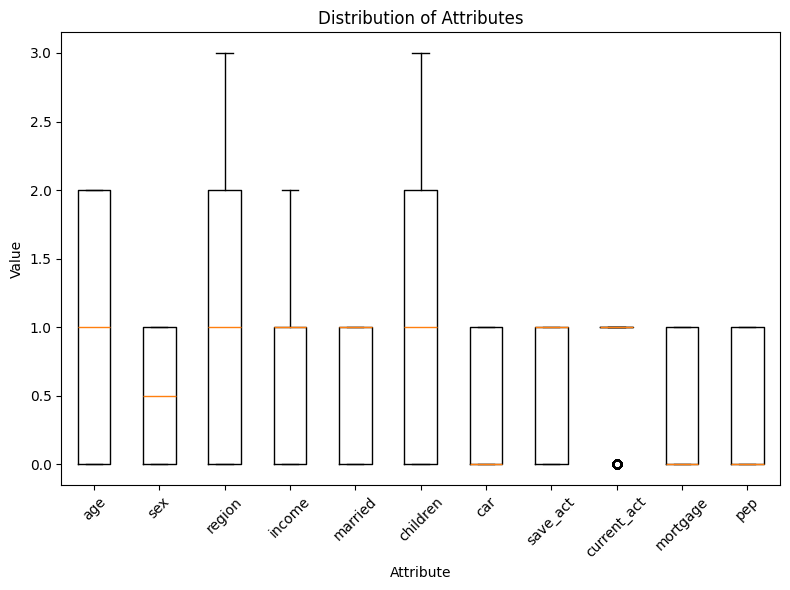

In [13]:
#Biểu đồ hộp
mean_values = df_processed.mean()
plt.figure(figsize=(8,6))
plt.boxplot(df_processed.values, labels=df_processed.columns)
plt.title('Distribution of Attributes')
plt.xlabel('Attribute')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

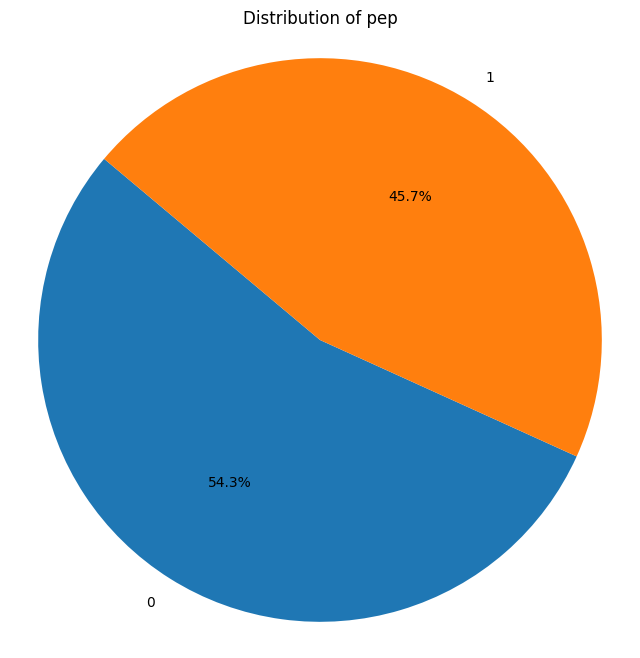

In [14]:
#Biểu đồ tròn
pie_attr = df_processed['pep']
count = pie_attr.value_counts()
plt.figure(figsize=(8,8))
plt.pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
plt.title(f"Distribution of {pie_attr.name}")
plt.axis('equal')
plt.show()

In [15]:
x = df_processed['income']
y = df_processed['age']
correlation = x.corr(y)
print(f"Correlation between {x.name} and {y.name}: {correlation}")

Correlation between income and age: 0.6880106606417279


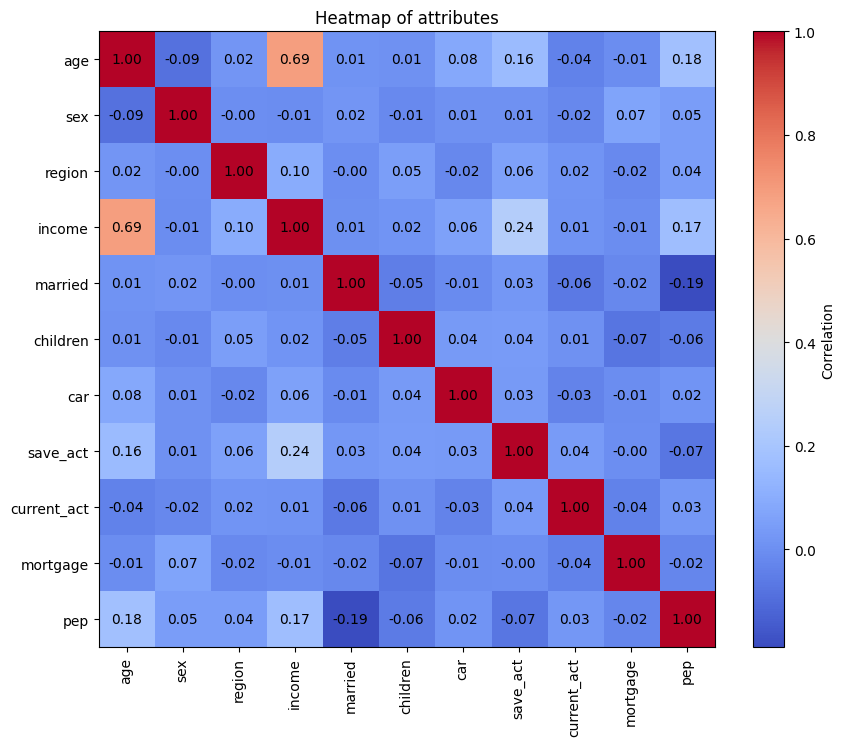

In [16]:
correlation_matrix=df_processed.corr()
plt.figure(figsize=(10,8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.title(f"Heatmap of attributes")
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        plt.text(j, i, "{:.2f}".format(correlation_matrix.iloc[i,j]), ha='center', va='center', color='black')
plt.show()

In [17]:
#Chia bộ dữ liệu thành thuộc tính (X) và kết quả (y)
X = df_processed.drop('pep', axis=1)  # Thuộc tính
y = df_processed['pep']  # Kết quả

# Split data thành training data và test data
seed = random.randint(1, 1000)
print(f"Seed: {seed}")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

Seed: 773


Random Forest

In [33]:
#Random Forest
clf = RandomForestClassifier(criterion='entropy')

# Train model
clf.fit(X_train, y_train)

# Dự đoán theo X_test
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy * 100:.2f}%")

              precision    recall  f1-score   support

           0       0.84      0.82      0.83        66
           1       0.79      0.81      0.80        54

    accuracy                           0.82       120
   macro avg       0.81      0.82      0.82       120
weighted avg       0.82      0.82      0.82       120

Accuracy: 81.67%


ID3

In [19]:
#ID3
id3 = DecisionTreeClassifier(criterion='entropy')

id3.fit(X_train, y_train)

y_pred = id3.predict(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy * 100:.2f}%")

[[52 14]
 [11 43]]
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        66
           1       0.75      0.80      0.77        54

    accuracy                           0.79       120
   macro avg       0.79      0.79      0.79       120
weighted avg       0.79      0.79      0.79       120

Accuracy: 79.17%


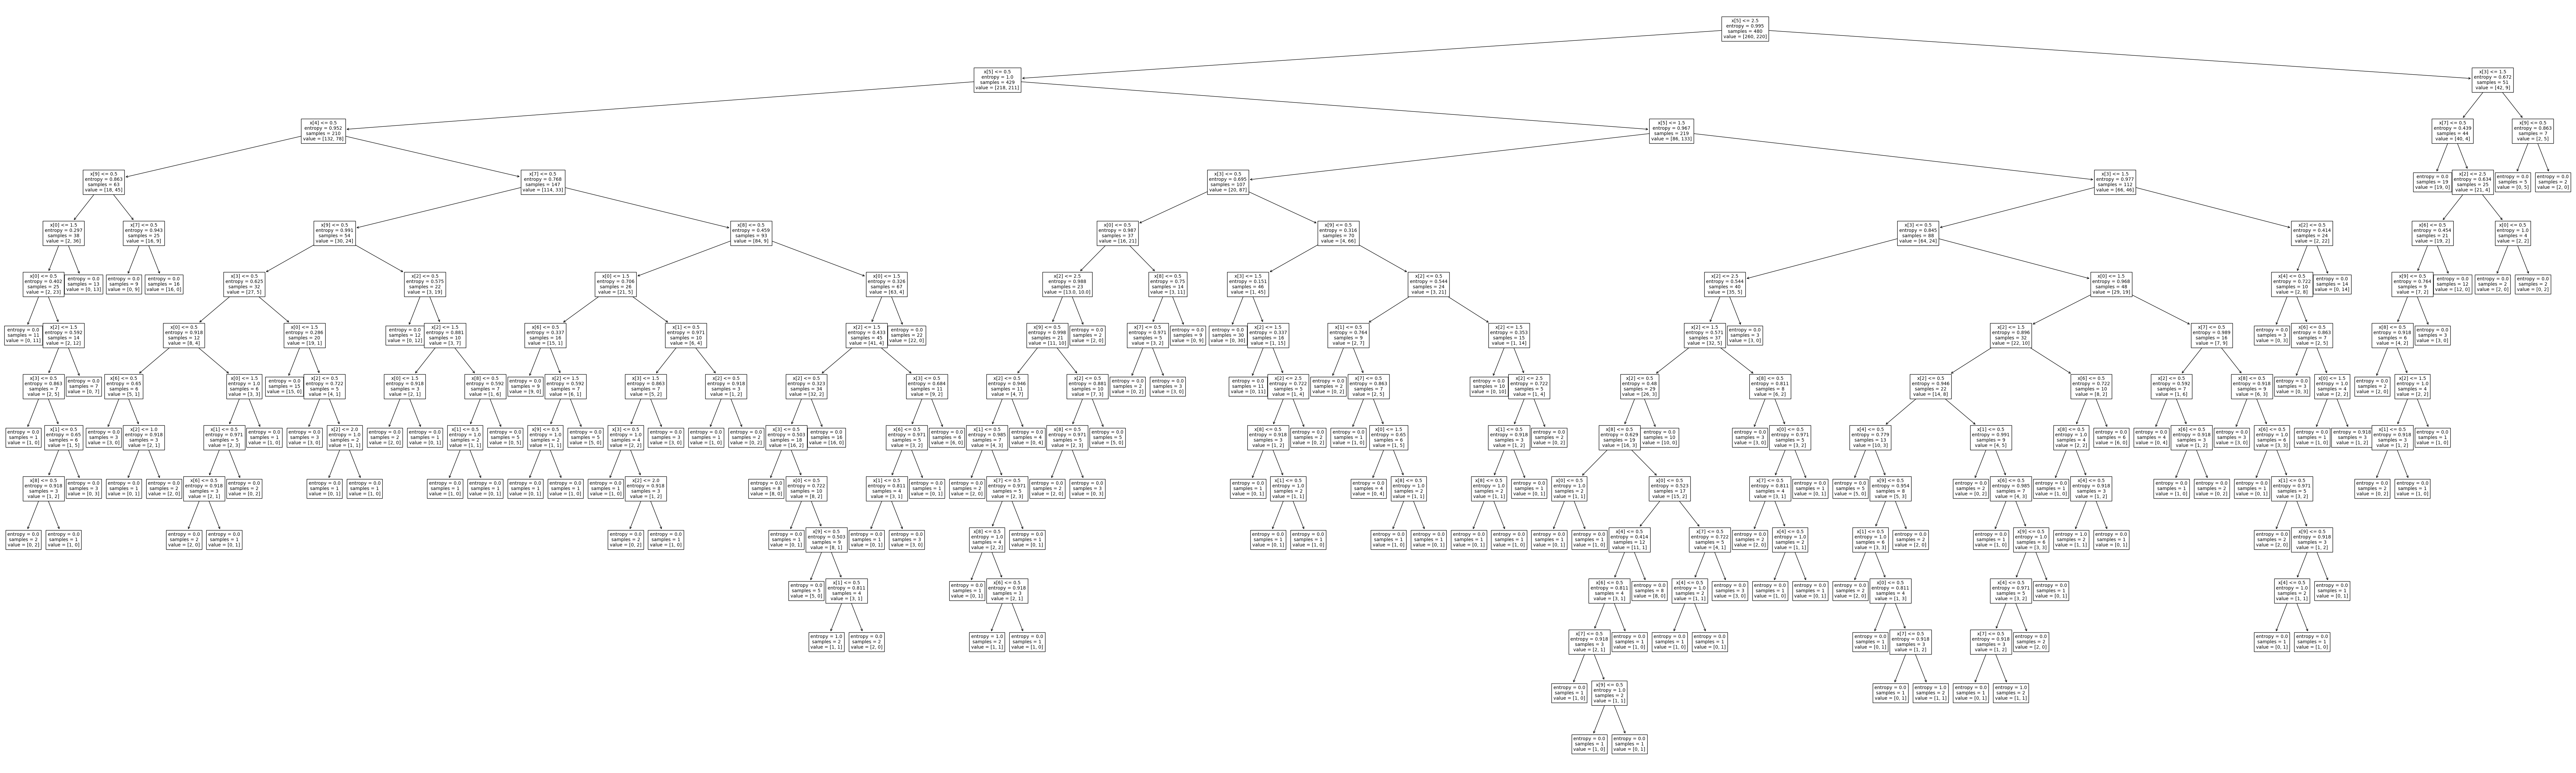

In [20]:
#Hiển thị cây quyết định
plt.figure(figsize=(100, 30))
plot_tree(id3, fontsize=10)
plt.show()

In [21]:
#CART
cart = DecisionTreeClassifier()

cart.fit(X_train, y_train)

y_pred = cart.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy * 100:.2f}%")

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        66
           1       0.76      0.78      0.77        54

    accuracy                           0.79       120
   macro avg       0.79      0.79      0.79       120
weighted avg       0.79      0.79      0.79       120

Accuracy: 79.17%


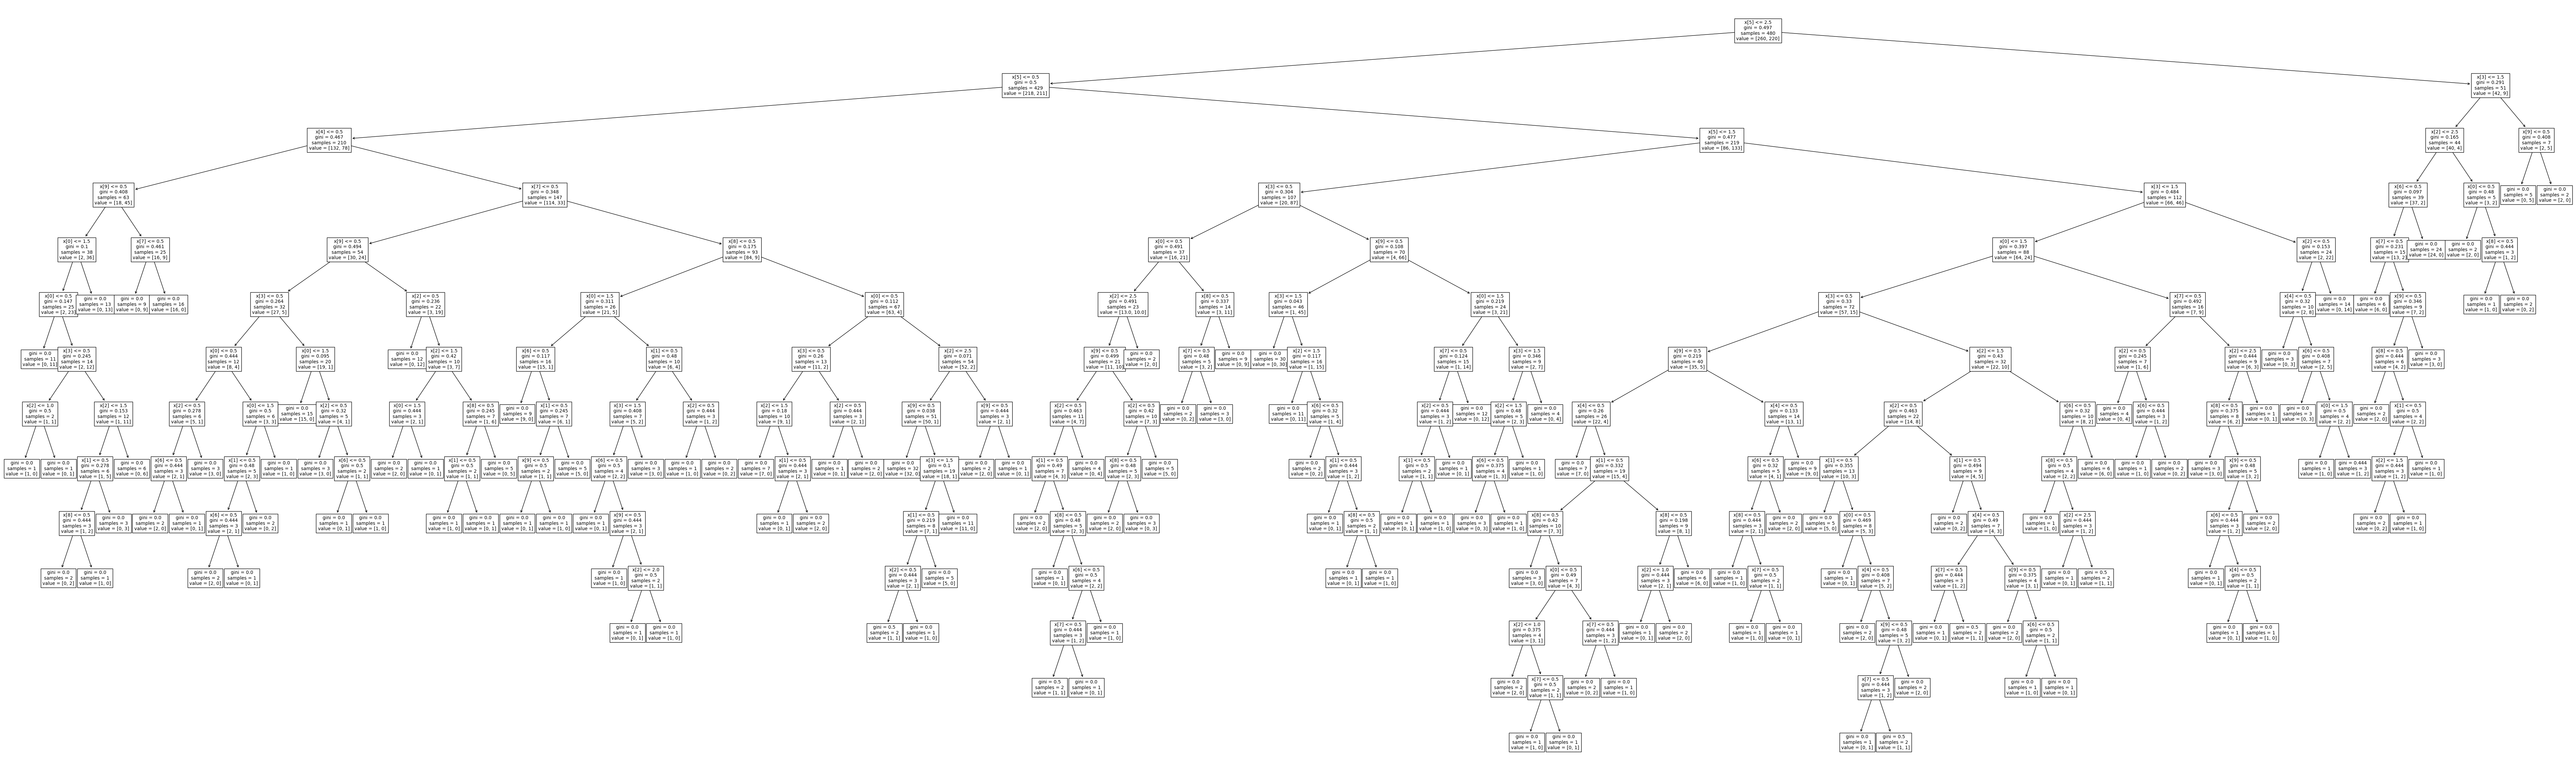

In [22]:
#Hiển thị cây quyết định
plt.figure(figsize=(100, 30))
plot_tree(cart, fontsize=10)
plt.show()